<a href="https://colab.research.google.com/github/Jack12619/Winc/blob/main/Winc_CO2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# libriaries inladen
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# tabel inladen en benoemen
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions")
emissions = tables[1]

In [3]:
# kolommen filteren en hernoemen
emissions.columns = emissions.columns.droplevel(0)
emissions.drop(['2017(% of world)','2017 vs 1990: change (%)', 'Per land area(t CO2/km2/yr)','Per capita(t CO2/cap/yr)', 'Total including LUCF[22]'], inplace=True, axis=1)
emissions.columns = ["country", "1990", "2005", "2017", "2018"]

In [4]:
# niet-landen eruit filteren
emissions = emissions.loc[~emissions.country.str.contains("European|World")]

In [5]:
#emissions["2018"] = emissions["2018"].replace(["45.54/2.52"],"48.06")  # vervang dubbele ingave voor het totaal van de 2 landen Servie & Montenegro
#emissions["2018"] = emissions["2018"].astype(float)  # cast kolom naar float
emissions = emissions.replace(["45.54/2.52"],"48.06")  # vervang dubbele ingave voor het totaal van de 2 landen Servie & Montenegro
emissions["2018"] = pd.to_numeric(emissions["2018"],errors='coerce')  # cast kolom naar float

In [6]:
# Plot de 5 grootste CO2 producenten gebaseerd op de laatste data. 
# eerst data sorteren en selecteren
top_5_2018 = emissions.sort_values(by="2018", ascending=False, na_position="last").head(5)

top_emissions = [top_5_2018["1990"], top_5_2018["2005"], top_5_2018["2017"],top_5_2018["2018"]]
years = [1990, 2005, 2017, 2018]

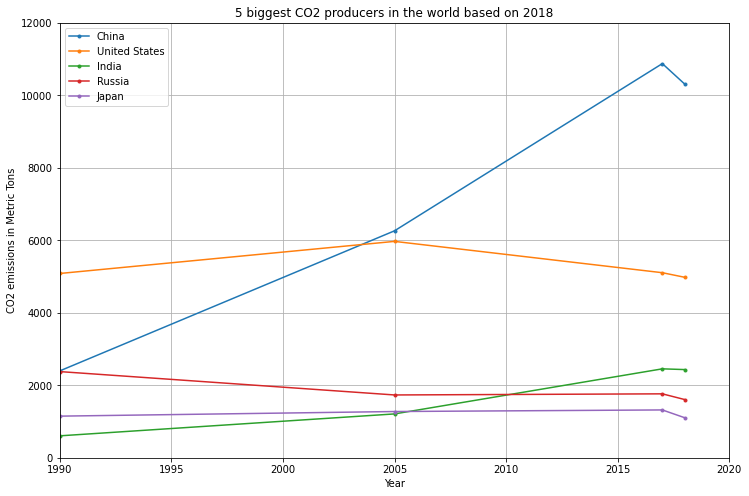

In [7]:
# plot line chart
fig,ax = plt.subplots(figsize=(12,8))

ax.plot(years,top_emissions, marker= ".")
ax.legend(top_5_2018['country'])
ax.set_xlabel("Year")
ax.set_ylabel("CO2 emissions in Metric Tons")
ax.set_title("The 5 biggest CO2 producers in the world based on 2018")
ax.set_ylim(0,12000)
ax.set_xlim(1990, 2020)
ax.grid()
plt.show()

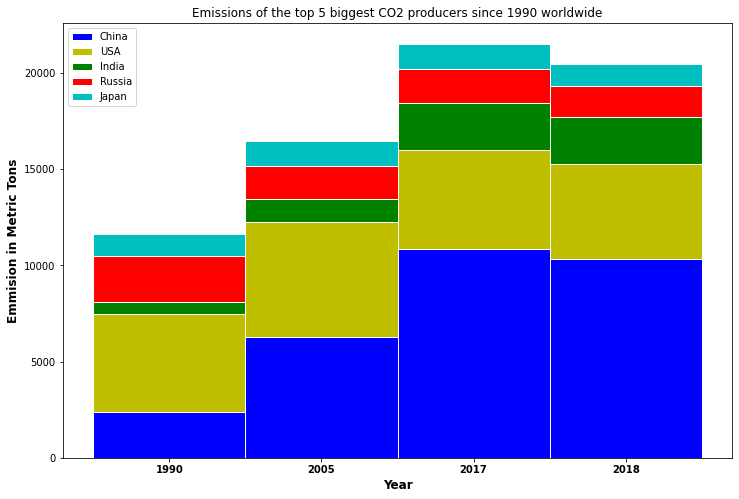

In [8]:
# 2e optie plot als stacked bar chart
fig,ax = plt.subplots(figsize=(12,8))

china =  top_5_2018[0:1][["1990","2005","2017","2018"]].squeeze()
usa =    top_5_2018[1:2][["1990","2005","2017","2018"]].squeeze()
india =  top_5_2018[2:3][["1990","2005","2017","2018"]].squeeze()
russia = top_5_2018[3:4][["1990","2005","2017","2018"]].squeeze()
japan =  top_5_2018[4:5][["1990","2005","2017","2018"]].squeeze()

bars1_2 = np.add(china, usa).tolist()
bars1_2_3 = np.add(bars1_2, india).tolist()
bars1_2_3_4 = np.add(bars1_2_3, russia).tolist()
bars1_2_3_4_5 = np.add(bars1_2_3_4, japan).tolist()

r = [0,1,2,3]
names = ["1990", "2005", "2017", "2018"]
barWidth = 1

plt.bar(r, china, color='b', edgecolor='white', width=barWidth, label = "China")
plt.bar(r, usa, bottom=china, color='y', edgecolor='white', width=barWidth, label="USA")
plt.bar(r, india, bottom=bars1_2, color='g', edgecolor='white', width=barWidth, label="India")
plt.bar(r, russia, bottom=bars1_2_3, color='r', edgecolor='white', width=barWidth, label="Russia")
plt.bar(r, japan, bottom=bars1_2_3_4, color='c', edgecolor='white', width=barWidth, label="Japan")

plt.xticks(r, names, fontweight='bold')
plt.xlabel("Year", fontsize=12, fontweight='bold')
plt.ylabel("Emmision in Metric Tons", fontsize=12, fontweight='bold')
plt.legend()
plt.title("Emissions of the 5 biggest CO2 producers since 1990 worldwide")
plt.show()

In [9]:
# Plot de 3 grootste stijgers en dalers in CO2 uitstoot
# eerst de relatieve verandering berekenen en een startpunt op 100 % maken
emissions["change_1990_1990"] = emissions["1990"] / emissions["1990"] * 100
emissions["change_1990_2005"] = emissions["2005"] / emissions["1990"] * 100
emissions["change_1990_2017"] = emissions["2017"] / emissions["1990"] * 100
emissions["change_1990_2018"] = emissions["2018"] / emissions["1990"] * 100

In [10]:
# data sorteren en selecteren
top_3_2018   = emissions.sort_values(by='change_1990_2018', ascending=True, na_position="last")[:3]
worst_3_2018 = emissions.sort_values(by='change_1990_2018', ascending=False, na_position="last")[:3]

top_3_data   = [top_3_2018["change_1990_1990"], top_3_2018["change_1990_2005"], top_3_2018["change_1990_2017"], top_3_2018["change_1990_2018"]]
worst_3_data = [worst_3_2018["change_1990_1990"], worst_3_2018["change_1990_2005"], worst_3_2018["change_1990_2017"], worst_3_2018["change_1990_2018"]]

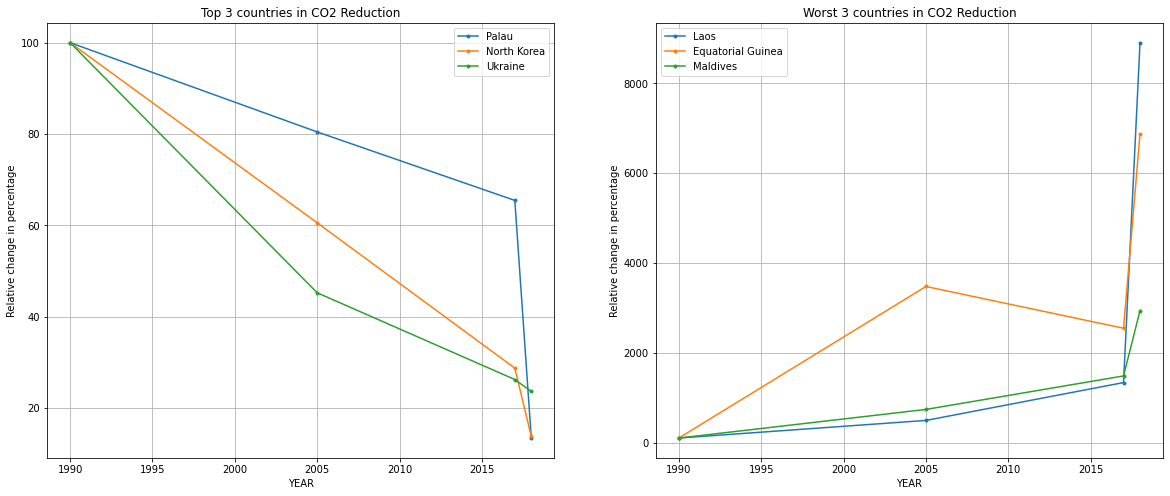

In [11]:
# plotten
fig, ((ax1,ax2)) = plt.subplots(ncols=2, figsize=(20,8))

ax1.plot(years, top_3_data, marker=".")
ax1.set_xlabel("YEAR")
ax1.set_ylabel("Relative change in percentage")
ax1.set_title("Top 3 countries in CO2 Reduction")
ax1.legend(top_3_2018["country"])
ax1.grid()

ax2.plot(years, worst_3_data, marker=".")
ax2.set_xlabel("YEAR")
ax2.set_ylabel("Relative change in percentage")
ax2.set_title("Worst 3 countries in CO2 Reduction")
ax2.legend(worst_3_2018["country"])
ax2.grid()

plt.show()

In [12]:
# Nogmaal plotten maar dan alleen landen met > 5 MT in 1990
# eerst landen met meer dan 5 MT uitstoot selecteren
emissions_over_5MT = emissions.loc[emissions["1990"] > 5]

# dan hiermee nieuwe data selecteren
top_3_2018_over_5MT   = emissions_over_5MT.sort_values(by='change_1990_2018', ascending=True, na_position="last")[:3]
worst_3_2018_over_5MT = emissions_over_5MT.sort_values(by='change_1990_2018', ascending=False, na_position="last")[:3]

top_3_2018_over_5MT_data   = [top_3_2018_over_5MT["change_1990_1990"], top_3_2018_over_5MT["change_1990_2005"], top_3_2018_over_5MT["change_1990_2017"], top_3_2018_over_5MT["change_1990_2018"]]
worst_3_2018_over_5MT_data = [worst_3_2018_over_5MT["change_1990_1990"], worst_3_2018_over_5MT["change_1990_2005"], worst_3_2018_over_5MT["change_1990_2017"], worst_3_2018_over_5MT["change_1990_2018"]]

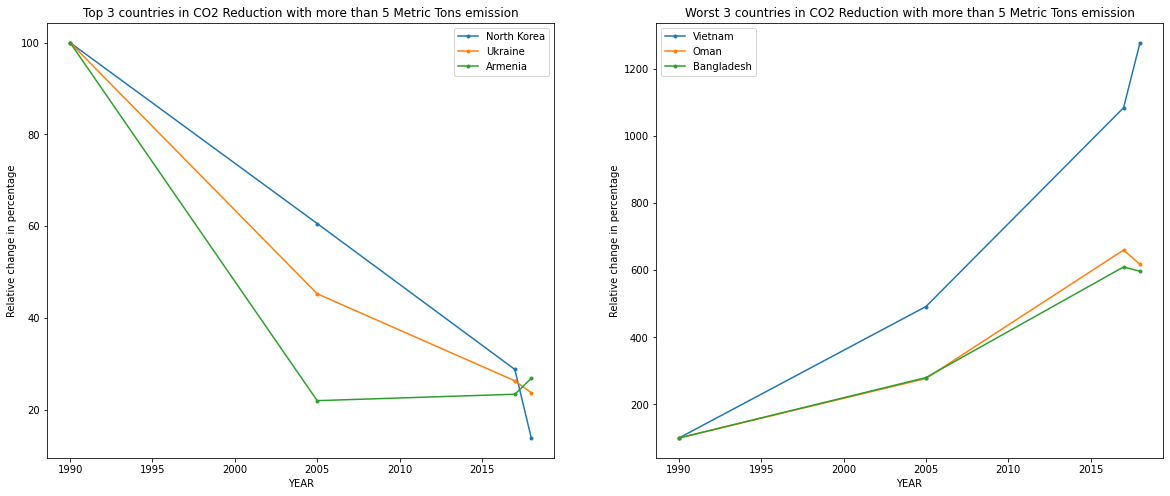

In [13]:
# opnieuw plotten
fig, ((ax1,ax2)) = plt.subplots(ncols=2, figsize=(20,8))

ax1.plot(years, top_3_2018_over_5MT_data, marker=".")
ax1.set_xlabel("YEAR")
ax1.set_ylabel("Relative change in percentage")
ax1.set_title("Top 3 countries in CO2 Reduction with more than 5 Metric Tons emission")
ax1.legend(top_3_2018_over_5MT['country'])

ax2.plot(years, worst_3_2018_over_5MT_data, marker=".")
ax2.set_xlabel("YEAR")
ax2.set_ylabel("Relative change in percentage")
ax2.set_title("Worst 3 countries in CO2 Reduction with more than 5 Metric Tons emission")
ax2.legend(worst_3_2018_over_5MT['country'])

plt.show()